In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Adding the magic command for matplotlib
%matplotlib inline

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Inserting try and except blocks to allow code to run smoothly
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | boyuibe
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | kasempa
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | tazovskiy
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | leningradskiy
Processing Record 17 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | pa

Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | akdepe
Processing Record 38 of Set 4 | chifeng
Processing Record 39 of Set 4 | cape elizabeth
City not found. Skipping...
Processing Record 40 of Set 4 | lokachi
Processing Record 41 of Set 4 | fiumicino
Processing Record 42 of Set 4 | adrar
Processing Record 43 of Set 4 | great falls
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | yaan
Processing Record 46 of Set 4 | lokosovo
Processing Record 47 of Set 4 | luanda
Processing Record 48 of Set 4 | saint-joseph
Processing Record 49 of Set 4 | anadyr
Processing Record 50 of Set 4 | shouguang
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | port-cartier
Processing Record 3 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | cotonou
Processing Record 6 of Set 5 | khanu woralaksaburi
Processing Record 7 of Set 5 | severo-kurilsk
Processing Re

Processing Record 23 of Set 8 | pangkalanbuun
Processing Record 24 of Set 8 | salalah
Processing Record 25 of Set 8 | havre-saint-pierre
Processing Record 26 of Set 8 | manacapuru
Processing Record 27 of Set 8 | omsukchan
Processing Record 28 of Set 8 | tiksi
Processing Record 29 of Set 8 | ixtapa
Processing Record 30 of Set 8 | fort-shevchenko
Processing Record 31 of Set 8 | college
Processing Record 32 of Set 8 | maba
Processing Record 33 of Set 8 | khorixas
Processing Record 34 of Set 8 | provideniya
Processing Record 35 of Set 8 | bengkulu
Processing Record 36 of Set 8 | cesme
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | batagay-alyta
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 42 of Set 8 | tura
Processing Record 43 of Set 8 | piranhas
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | moussoro

Processing Record 12 of Set 12 | angoche
Processing Record 13 of Set 12 | coroico
Processing Record 14 of Set 12 | borogontsy
Processing Record 15 of Set 12 | tomatlan
Processing Record 16 of Set 12 | ojinaga
Processing Record 17 of Set 12 | cervo
Processing Record 18 of Set 12 | kathu
Processing Record 19 of Set 12 | punta alta
Processing Record 20 of Set 12 | ola
Processing Record 21 of Set 12 | bone
Processing Record 22 of Set 12 | virginia beach
Processing Record 23 of Set 12 | umm bab
Processing Record 24 of Set 12 | teya
Processing Record 25 of Set 12 | kyren
Processing Record 26 of Set 12 | wankaner
Processing Record 27 of Set 12 | zhuhai
Processing Record 28 of Set 12 | ossora
Processing Record 29 of Set 12 | mugur-aksy
Processing Record 30 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 32 of Set 12 | san alberto
Processing Record 33 of Set 12 | xai-xai
Processing Record 34 of Set 12 

In [9]:
# Getting the total number of cities with data retrived.
len(city_data)

539

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,50.47,56,100,4.45,NZ,2021-10-20 22:29:04
1,Tuatapere,-46.1333,167.6833,50.34,58,96,3.42,NZ,2021-10-20 22:29:05
2,Butaritari,3.0707,172.7902,81.46,74,28,9.73,KI,2021-10-20 22:29:05
3,Dudinka,69.4058,86.1778,25.34,92,100,17.67,RU,2021-10-20 22:29:06
4,Boyuibe,-20.4167,-63.2833,85.91,28,62,5.73,BO,2021-10-20 22:29:06
5,Rikitea,-23.1203,-134.9692,74.68,73,10,20.45,PF,2021-10-20 22:28:05
6,Kasempa,-13.4584,25.8338,70.84,50,86,9.24,ZM,2021-10-20 22:29:07
7,Hilo,19.7297,-155.0900,80.33,65,40,13.80,US,2021-10-20 22:25:51
8,Fortuna,40.5982,-124.1573,64.85,68,1,5.01,US,2021-10-20 22:27:51
9,Punta Arenas,-53.1500,-70.9167,51.82,50,40,19.57,CL,2021-10-20 22:29:08


In [11]:
# Rearranging column order for readability
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-10-20 22:29:04,-46.2817,169.8464,50.47,56,100,4.45
1,Tuatapere,NZ,2021-10-20 22:29:05,-46.1333,167.6833,50.34,58,96,3.42
2,Butaritari,KI,2021-10-20 22:29:05,3.0707,172.7902,81.46,74,28,9.73
3,Dudinka,RU,2021-10-20 22:29:06,69.4058,86.1778,25.34,92,100,17.67
4,Boyuibe,BO,2021-10-20 22:29:06,-20.4167,-63.2833,85.91,28,62,5.73
5,Rikitea,PF,2021-10-20 22:28:05,-23.1203,-134.9692,74.68,73,10,20.45
6,Kasempa,ZM,2021-10-20 22:29:07,-13.4584,25.8338,70.84,50,86,9.24
7,Hilo,US,2021-10-20 22:25:51,19.7297,-155.0900,80.33,65,40,13.80
8,Fortuna,US,2021-10-20 22:27:51,40.5982,-124.1573,64.85,68,1,5.01
9,Punta Arenas,CL,2021-10-20 22:29:08,-53.1500,-70.9167,51.82,50,40,19.57


In [12]:
# First create the folder in the correct place for the csv file to be stored in.
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

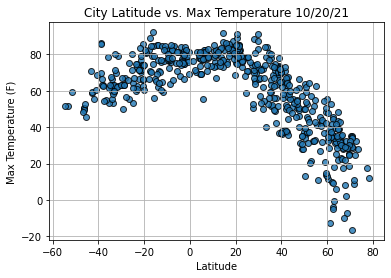

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

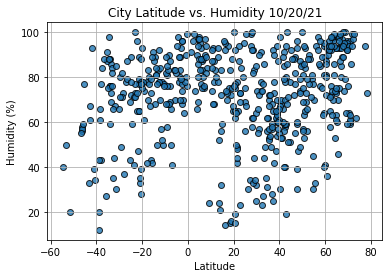

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

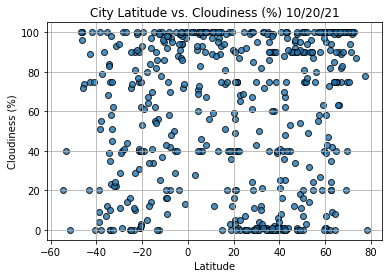

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

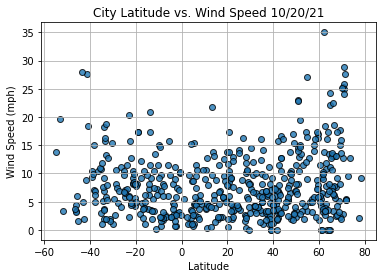

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Creating hemisphere dataframes 
#Using loc by index value
index13 = city_data_df.loc[13]
index13

City                Leningradskiy
Country                        RU
Date          2021-10-20 22:29:10
Lat                       69.3833
Lng                      178.4167
Max Temp                    25.39
Humidity                       96
Cloudiness                    100
Wind Speed                  15.05
Name: 13, dtype: object

In [20]:
# Filtering a specific column to find the right data
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
534     True
535     True
536     True
537     True
538    False
Name: Lat, Length: 539, dtype: bool

In [21]:
# Getting the data for the northern hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Butaritari,KI,2021-10-20 22:29:05,3.0707,172.7902,81.46,74,28,9.73
3,Dudinka,RU,2021-10-20 22:29:06,69.4058,86.1778,25.34,92,100,17.67
7,Hilo,US,2021-10-20 22:25:51,19.7297,-155.0900,80.33,65,40,13.80
8,Fortuna,US,2021-10-20 22:27:51,40.5982,-124.1573,64.85,68,1,5.01
10,Tazovskiy,RU,2021-10-20 22:29:08,67.4667,78.7000,29.46,89,100,7.58


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


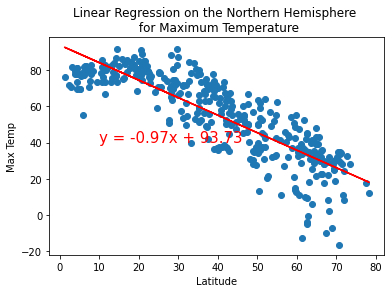

In [23]:
# Linear regression on the Northern Hemisphere for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


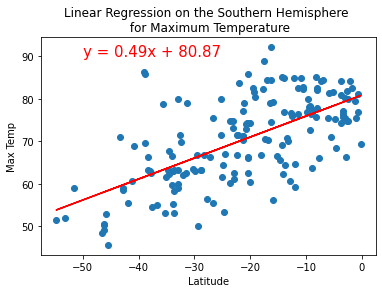

In [24]:
# Linear regression on the Southern Hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


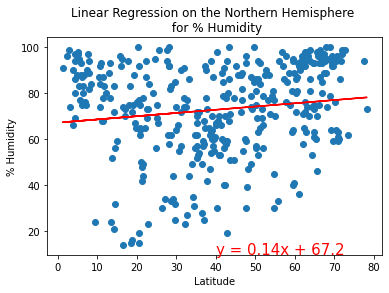

In [25]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))


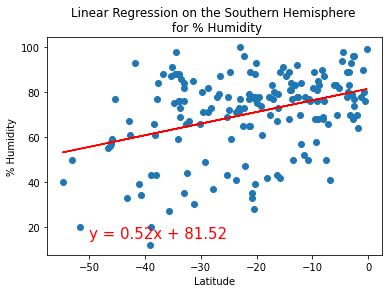

In [26]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


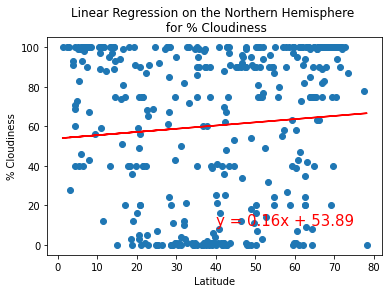

In [27]:
# Linear regression on the Northern Hemisphere for cloudiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))


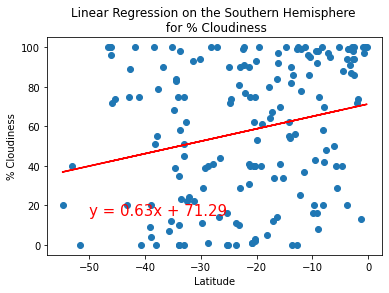

In [28]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))


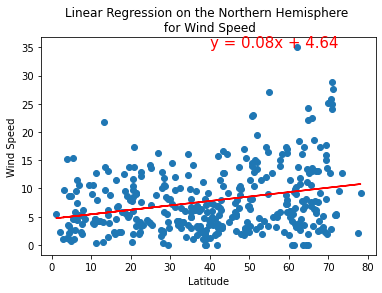

In [29]:
# Linear regression on the Northern Hemisphere for windiness 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))


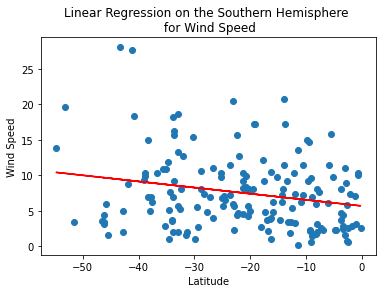

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
